***Описание проекта***

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Цель исследования: Определить закономерности влияющие на успешность игры. 

**1. Изучение данных**

In [1]:
import pandas as pd # импорт библиотек
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/datasets/games.csv') # вывод таблицы данных 
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info() # информация о данных в таблице
df.isna().sum() # вывод количества пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Названия столбцов:

•	Name — название игры

•	Platform — платформа

•	Year_of_Release — год выпуска

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100)

•	User_Score — оценка пользователей (максимум 10)

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [4]:
df['Genre'].unique() # вывод уникальных значений столбца жанр

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Расшифровка значений жанров и поджанров по классической класификации:
Action - Действие
Sports - Спорт (поджанр Действие)
Misc - Разное
Role-Playing - Ролевые
Shooter - Стрелялки (поджанр Действие)
Adventure - Приключение
Racing - Гонки (поджанр Действие)
Platform - Платформенные игры (поджанр Действие)
Simulation - Симулятор
Fighting - Единоборства (поджанр Действие)
Strategy - Стратегия
Puzzle  - Головоломки

In [5]:
df['Genre'].value_counts() # вывод количества уникальных значений столбца жанр

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Хочу отметить, что большинство игр принадлежит к жанру Action, меньше всего игр в жанре Puzzle.

In [6]:
df['Rating'].unique() # вывод уникальных значений столбца рейтинг

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

 Расшифровка рейтинговых оценок:
 1. E -«Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. 
 2. T -«Подросткам»: Игра подходит для лиц от 13 лет.
 3. M -«Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
 4. E10+  -«Для всех от 10 лет и старше».
 5. EC -«Для детей младшего возраста»: Игра подходит для детей от 3 лет.
 6. K-A -«Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
 7. RP - «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.
 8. AO - «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.

In [7]:
df['Rating'].value_counts() # вывод количества уникальных значений столбца рейтинг

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

Хочу отметить, что большинство компьютерных игр с оценкой E -«Для всех», одна игра с рейтингом AO - «Только для взрослых».

In [8]:
df['Year_of_Release'].unique() # вывод уникальных значений столбца год выхода

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
df['Year_of_Release'].value_counts() # вывод количества уникальных значений столбца год выхода

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

Больше всего игр вышло в 2008 году, меньше всего, что логично, в 1980 году.

In [10]:
df['User_Score'].unique() #уникальные оценки пользователей, есть оценка О, a также tbd.

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть оценка О, следовательно пропущенные значения не получиться заменить на 0.

**1. Вывод**

1. Таблица содержит данные о компьютерных играх.
2. Большое количество пропусков в столбцах с оценками пользователей и критиков, а также с рейтингом огрганизации ESRB.
3. Также необходимо привести названия столбцов к нижнему регистру, и поменять тип данных в столбце год релиза.

**2. Подготовка данных**

1. Поменяем регистр в названиях столбцов на нижний.

In [11]:
df.columns = df.columns.str.lower() # перевод регистра названий столбцов

In [12]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


2. Пропуски есть в столбцах name, year_of_release, genre, critic_score, user_score, rating.    

In [13]:
df.isna().sum() # вывод количества пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Строки с пропущенными значениями name и genre удалим, так как заполнить пропуски здесь не представляется возможным.

In [14]:
df = df.dropna(subset = ['name', 'genre']) #удаление двух пропущенных строк с пропущенными значениями в колонках имя и жанр

Заменим пропущенные значения и 'tbd' в оценке пользователей на значение -1, так как если мы заменим медианной или средним значение, то это может повлиять на результаты проверки гипотез и оценки зависимостей продаж от оценок пользователей и критиков.

In [15]:
df['user_score'] = df['user_score'].fillna(-1)  #замена пропусков на -1

/tmp/ipykernel_91/483410910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = df['user_score'].fillna(-1)  #замена пропусков на -1


In [16]:
df['user_score'] = df['user_score'].replace('tbd', -1) #замена значения 'tbd' на -1

/tmp/ipykernel_91/2442428673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = df['user_score'].replace('tbd', -1) #замена значения 'tbd' на -1


In [17]:
df['user_score'] = df['user_score'].astype('float32')# перевод значений в тип данных float

/tmp/ipykernel_91/880548739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = df['user_score'].astype('float32')# перевод значений в тип данных float


Так же заменю пропущенные значения на -1 в оценке критиков и рейтинге.

In [18]:
df['rating'] = df['rating'].fillna(-1) #замена пропусков на -1

/tmp/ipykernel_91/1247995449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna(-1) #замена пропусков на -1


In [19]:
df['critic_score'] = df['critic_score'].fillna(-1) # замена пропусков на -1

/tmp/ipykernel_91/207207207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['critic_score'] = df['critic_score'].fillna(-1) # замена пропусков на -1


Заменим пропуски в столбце 'год выхода'.

С помощью transform найдем значение среднего года для одинаковых игр с разных платформ и заменим им пропуски.

In [20]:
df_transformed = df.groupby('name')['year_of_release'].transform('mean')
df['year_of_release'] = df['year_of_release'].fillna(df_transformed)

/tmp/ipykernel_91/2509468132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'] = df['year_of_release'].fillna(df_transformed)


In [21]:
df['year_of_release'].isna().sum()

146

Также с помощью transform заполним остальные пропуски медианным годом по каждой платформе.

In [22]:
#df_transformed_median = df.groupby('platform')['year_of_release'].transform('median')
#df['year_of_release'] = df['year_of_release'].fillna(df_transformed_median)

In [23]:
df = df.dropna(subset = ['year_of_release']) #удаление строк с пропущенными значениями в колонке год релиза

In [24]:
df['year_of_release'].isna().sum()

0

3. Заменим тип данных в столбце year_of_release на тип int

In [25]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [26]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1


4. Добавим столбец с суммой продаж

In [27]:
df['sum_sale'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [28]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float32
 10  rating           16567 non-null  object 
 11  sum_sale         16567 non-null  float64
dtypes: float32(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB


In [30]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sum_sale           0
dtype: int64

**2. Вывод:**

Преобразовали данные для дальнейшего исследования:
1. Удалили две строки где были пропущены имя и жаннр игры в исходной таблицы.
2. Заполнили пропуски в стоблце "год релиза" с помощью функции transform.
3. Пропуски в оценке критиков, пользователей, в рейтинге я заполнила -1, так как считаю, что некорректно заполнить данные пропуски медианой, они могут повлиять на результаты исследования.


**3. Исследовательский анализ данных**


1. Построим график выпуска игр по годам.

In [31]:
game_count = df.groupby('year_of_release')['name'].count() # сгруппируем данные по годам и посчитаем количество игр, выпущенных за каждый год

<AxesSubplot:xlabel='year_of_release', ylabel='count_game'>

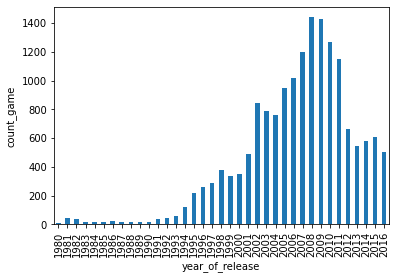

In [32]:
game_count.plot(ylabel='count_game', kind='bar') #столбчатый график

In [33]:
game_count.describe()

count      37.000000
mean      447.756757
std       455.802918
min         9.000000
25%        36.000000
50%       339.000000
75%       764.000000
max      1441.000000
Name: name, dtype: float64

Больше всего игр выпускалось с 2000 по 2016 годы.

Важны ли данные за все периоды?
Определенно нет, так как с возрастанием количества выхода новых игр, и выходом новых жанров, настроений мира, меняются также предпочтения пользователей. Для того, чтобы выявить критерии игры, влияющие на успешность продаж в 2017, достаточно будет взять данные за последние 16 лет.


2. Построим график распределения продаж по годам по разным платформам.

<AxesSubplot:xlabel='year_of_release', ylabel='sum_sale'>

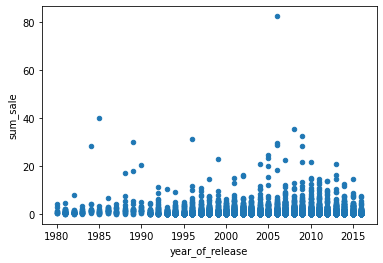

In [34]:
df.plot(x='year_of_release', y = 'sum_sale', kind='scatter')

По диаграмме рассеяния можно отметить что:
1. к 2010 году продажи игр росли, затем к 2016 пошло снижение продаж.
2. по выбросам на графике можно сказать, что к лидерам продаж можно отнести игры, суммарные продажи которых по всему миру преодолели планку 17 миллионов копий.

In [35]:
display(df.query('sum_sale >= 17'))# вывод списка игр с максимальными суммарными продажами в период с 1980 по 2016 года

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,-1,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,-1,28.31


"Марио" действительно самая популярная игра!

3. Выберите платформы с наибольшими суммарными продажами.

In [36]:
platform_sum_sale = df.groupby('platform')['sum_sale'].sum().to_frame() # вывод суммарных продаж по платформам
display(platform_sum_sale.sort_values(by = 'sum_sale', ascending=False))

,sum_sale
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


In [37]:
#list_top_platform = []
#for index in range(0,10):
    #list_top_platform.append(platform_sum_sale[index])
    
 

In [38]:
list_top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC', '3DS'] # список 10 платформ- лидеров продаж игр

In [39]:
lider_sum_sale = df.query('platform in @list_top_platform and 2000 <= year_of_release <=2016') # вывод среза по продажам на успешных платформах по годам

In [40]:
lider_sum_sale.pivot_table(index='platform', columns='year_of_release', values='sum_sale', aggfunc=sum)

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.30,63.20,51.76,56.57,43.76,27.78,15.14
DS,NaN,NaN,NaN,NaN,17.27,130.14,119.81,147.23,145.36,119.56,85.35,26.33,11.67,1.54,NaN,NaN,NaN
GBA,0.07,61.53,74.16,56.67,77.91,34.53,5.46,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,4.66,5.47,8.57,8.89,10.39,4.38,2.85,9.28,12.46,17.05,26.15,35.16,23.45,13.01,13.28,8.52,5.25
PS,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,39.17,166.43,208.36,194.00,211.81,160.91,103.99,76.10,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,0.48,NaN,NaN,NaN,0.19,20.96,73.19,118.79,130.93,142.96,157.98,108.28,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,NaN,NaN,NaN,NaN,7.06,43.84,56.28,47.30,36.76,37.78,35.04,17.82,7.95,3.38,0.24,0.12,NaN


По таблице можно сказать, что период с 2003 по 2014 происходит смена старых платформ на новые.

Вывод: на основе исследования предыдущих вопросов можно сделать вывод, что для исследования необходимо взять данные по продажам игр за 2012-2016годы.

In [41]:
df_2003 = df.query('year_of_release >= 2012') # срез данных по годам 2012-2016

In [42]:
df_2003

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,-1,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01


In [43]:
platform_sale_2003 = df_2003.groupby('platform')['sum_sale'].sum().sort_values(ascending=False).to_frame() #список наиболее прибыльных платформ с 2012-2016 годы
platform_sale_2003.head(10)

,sum_sale
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.01
XOne,159.32
WiiU,82.19
PC,63.51
PSV,49.18
Wii,36.60


In [44]:
list_platform_2003 = ['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS'] #список наиболее прибыльных платформ с 2012-2016 годы

In [45]:
platform_top_2003 = df_2003.query('platform in @list_platform_2003') # срез таблицы по данным самых продающих платформ

In [46]:
platform_top_2003

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,-1,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01


In [47]:
platform_top_2003.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2724 non-null   object 
 1   platform         2724 non-null   object 
 2   year_of_release  2724 non-null   int64  
 3   genre            2724 non-null   object 
 4   na_sales         2724 non-null   float64
 5   eu_sales         2724 non-null   float64
 6   jp_sales         2724 non-null   float64
 7   other_sales      2724 non-null   float64
 8   critic_score     2724 non-null   float64
 9   user_score       2724 non-null   float32
 10  rating           2724 non-null   object 
 11  sum_sale         2724 non-null   float64
dtypes: float32(1), float64(6), int64(1), object(4)
memory usage: 266.0+ KB


In [48]:
platform_top_2003.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sum_sale           0
dtype: int64

In [49]:
platform_top_2003.pivot_table(index='platform', columns='year_of_release', values= 'sum_sale', aggfunc=sum)#таблица продаж с 2012 года по 2016 для 10 самых продающих платформ

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.76,56.57,43.76,27.78,15.14
DS,11.67,1.54,NaN,NaN,NaN
PC,23.45,13.01,13.28,8.52,5.25
PS3,108.28,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSV,16.19,10.59,11.90,6.25,4.25
Wii,22.94,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60
X360,100.72,88.58,34.74,11.96,1.52


По данной таблице можно сделать вывод, что продажи на всех платформах имеют тенденцию к падению. Потенциально прибыльными можно назвать платформы 3DS, XOne и PS4.

4. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам по данным 2012-2016 годов.

<AxesSubplot:title={'center':'sum_sale'}, xlabel='platform'>

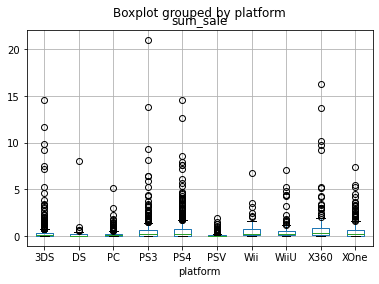

In [50]:
platform_top_2003.boxplot(column='sum_sale',by='platform')

Видим выбросы значений.

(0.0, 2.0)

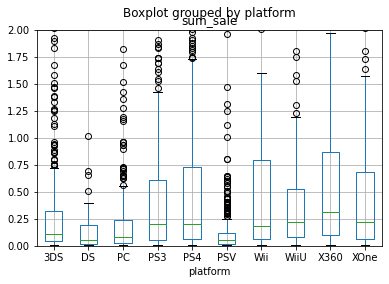

In [51]:
platform_top_2003.boxplot(column='sum_sale', by='platform')
plt.ylim(0, 2,5)

Вывод: продажи большинства игр по разным платформам не превышает 2 миллионов. 

5. Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [52]:
 ps4_user_score = platform_top_2003.query('platform == "PS4" and user_score != -1') #срез данных для платформы "PS4"

<AxesSubplot:xlabel='user_score', ylabel='sum_sale'>

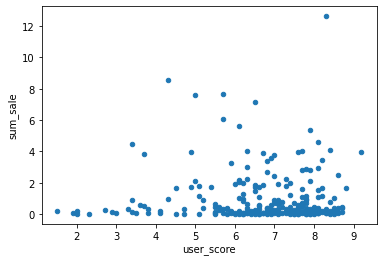

In [53]:
ps4_user_score.plot(x = 'user_score', y = 'sum_sale', kind = 'scatter') # построение диаграммы рассеяния

In [54]:
display(ps4_user_score['user_score'].corr(ps4_user_score['sum_sale'])) # расчет корреляции

-0.031957109005188285

Значение коэффицианта корреляции говорит об отсутствии линейной зависимости между оценкой пользователей и продажами на платформе PS4 по данным таблицы за 2012-2016 года.

In [55]:
 ps4_critic_score = platform_top_2003.query('platform == "PS4" and critic_score != -1') #срез данных для платформы "PS4"

<AxesSubplot:xlabel='critic_score', ylabel='sum_sale'>

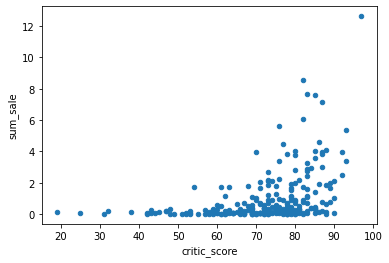

In [56]:
ps4_critic_score.plot(x = 'critic_score', y = 'sum_sale', kind = 'scatter') # построение диаграммы рассеяния

In [57]:
display(ps4_critic_score['critic_score'].corr(ps4_critic_score['sum_sale']))

0.40656790206178095

Значение коэффицианта корреляции говорит о присутствии умеренной линейной зависимости между оценкой критиков и продажами на платформе PS4 по данным таблицы за 2012-2016 года.

Теперь посмотрим повторяться ли данные выводы для данных по всем платформам за период 2012-2016 годов.

In [58]:
df_2003_user_score = df_2003.query('user_score != -1') # не учитываем искусственную замену пропущенных оценок

<AxesSubplot:xlabel='user_score', ylabel='sum_sale'>

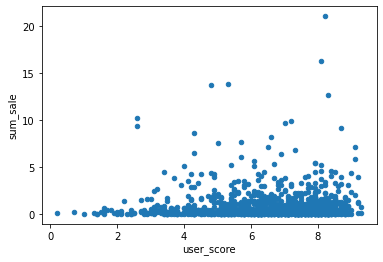

In [59]:
df_2003_user_score.plot(x = 'user_score', y = 'sum_sale', kind = 'scatter')

In [60]:
display(df_2003_user_score['user_score'].corr(df_2003_user_score['sum_sale']))

0.004518644519169577

Значение коэффицианта корреляции говорит об отсутствии линейной зависимости между оценкой пользователей и продажами на всех платформах по данным таблицы за 2012-2016 года.

In [61]:
df_2003_critic_score = df_2003.query('critic_score != -1')

<AxesSubplot:xlabel='critic_score', ylabel='sum_sale'>

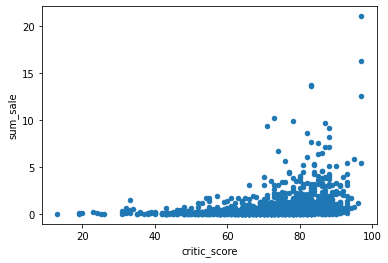

In [62]:
df_2003_critic_score.plot(x = 'critic_score', y = 'sum_sale', kind = 'scatter')

In [63]:
display(df_2003_critic_score['critic_score'].corr(df_2003_critic_score['sum_sale'])) #расчет коэффициента корреляции между оценкой критиков и продажами

0.3079511444868076

Значение коэффицианта корреляции говорит об отсутствии линейной зависимости между оценкой критиков и продажами на всех платформах по данным таблицы за 2012-2016 года.

На основании расчетов коэффициента корреляции нельзя сделать однозначный вывод о зависимости объемов продаж и оценок критиков и пользователей, скорее можно сделать вывод, что прямой зависимости нет, либо она очень слабая.

'Коэффициент корреляции для платформы'

'PS4'

'равен'

-0.031957109005188285

'Коэффициент корреляции для платформы'

'PS3'

'равен'

-0.005043046458187048

'Коэффициент корреляции для платформы'

'X360'

'равен'

0.006314948344774403

'Коэффициент корреляции для платформы'

'3DS'

'равен'

0.19814961706058062

'Коэффициент корреляции для платформы'

'XOne'

'равен'

-0.06892505319711206

'Коэффициент корреляции для платформы'

'WiiU'

'равен'

0.4002190377710612

'Коэффициент корреляции для платформы'

'PC'

'равен'

-0.12033868713356886

'Коэффициент корреляции для платформы'

'PSV'

'равен'

-0.004339454898299734

'Коэффициент корреляции для платформы'

'Wii'

'равен'

0.2775423930547496

'Коэффициент корреляции для платформы'

'DS'

'равен'

0.8827087062516973

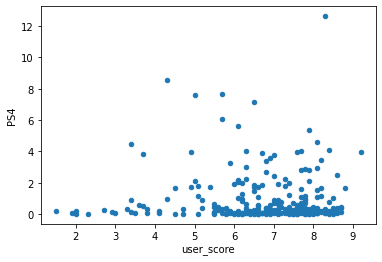

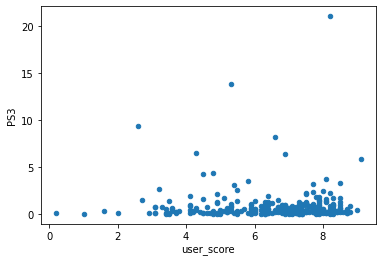

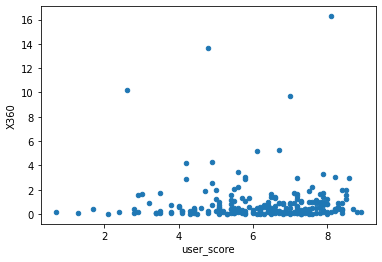

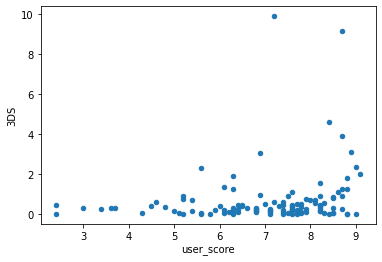

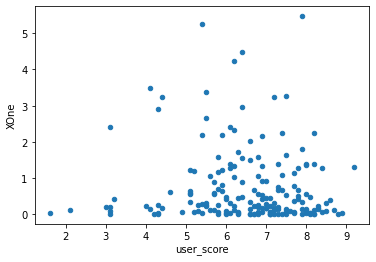

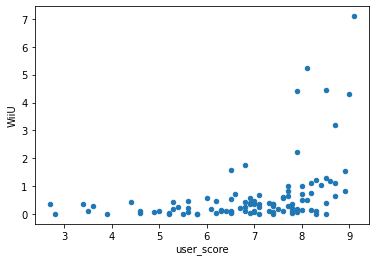

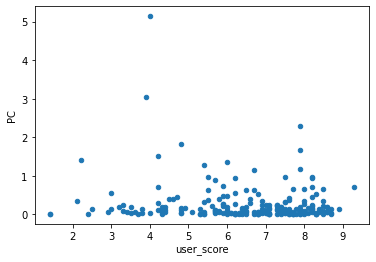

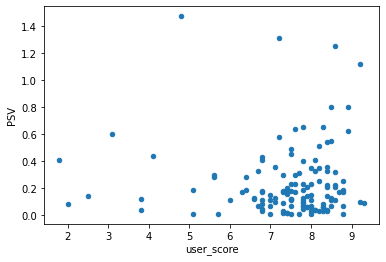

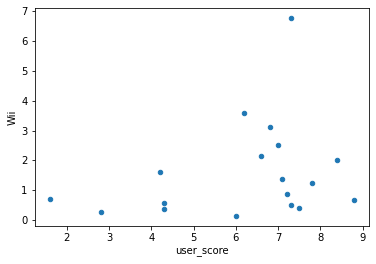

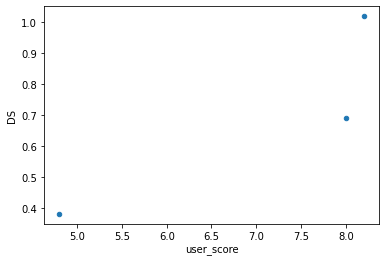

In [64]:
list_platform_2003 = ['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

for element in list_platform_2003:
    element_user_score = platform_top_2003.query('platform == @element and user_score != -1')
    element_user_score.plot(x = 'user_score', y = 'sum_sale', kind = 'scatter', ylabel = element)
    display('Коэффициент корреляции для платформы', element, 'равен', element_user_score['user_score'].corr(element_user_score['sum_sale']))

Значения коэффициента корреляции, говорит о том, что отсутствует линейная зависимость между оценкой пользователей и объемами продаж. Значение коэффициента корреляции для платформы DS не может быть показательным, по диаграмме рассеяния в
идно что выборка мала.

'Коэффициент корреляции для платформы'

'PS4'

'равен'

0.40656790206178095

'Коэффициент корреляции для платформы'

'PS3'

'равен'

0.3313706318754621

'Коэффициент корреляции для платформы'

'X360'

'равен'

0.3602659026138049

'Коэффициент корреляции для платформы'

'3DS'

'равен'

0.32045778764077804

'Коэффициент корреляции для платформы'

'XOne'

'равен'

0.4169983280084017

'Коэффициент корреляции для платформы'

'WiiU'

'равен'

0.34837976012017485

'Коэффициент корреляции для платформы'

'PC'

'равен'

0.24057023259681187

'Коэффициент корреляции для платформы'

'PSV'

'равен'

0.0944878992931617

'Коэффициент корреляции для платформы'

'Wii'

'равен'

-0.4059967406465306

'Коэффициент корреляции для платформы'

'DS'

'равен'

1.0

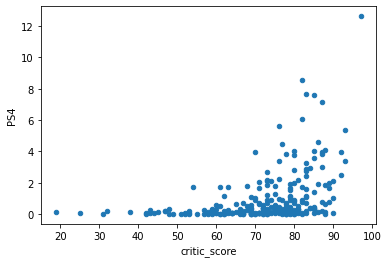

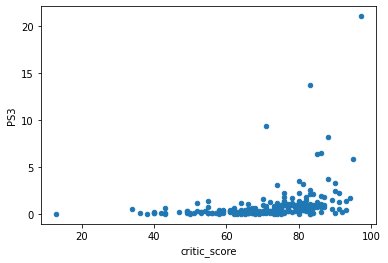

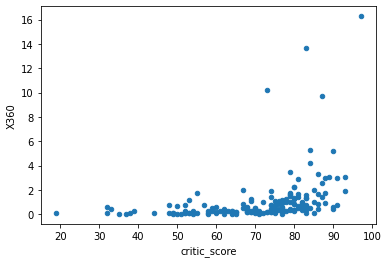

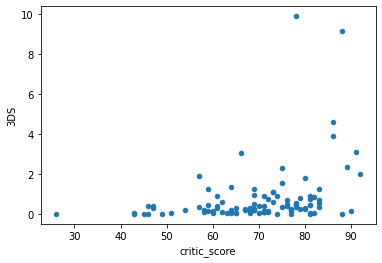

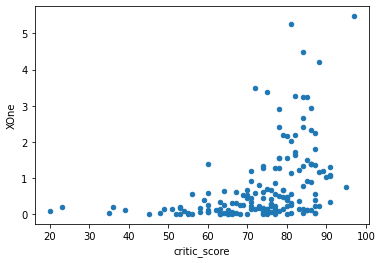

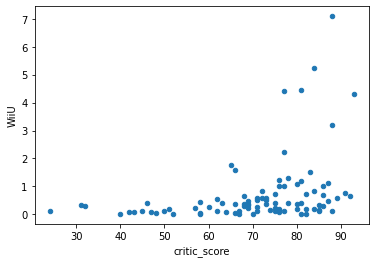

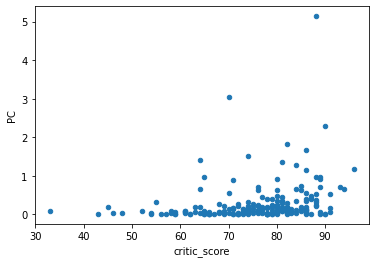

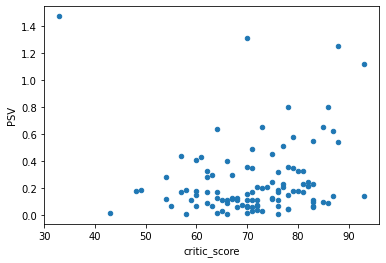

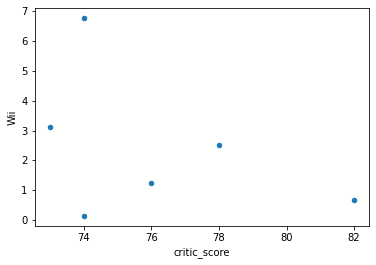

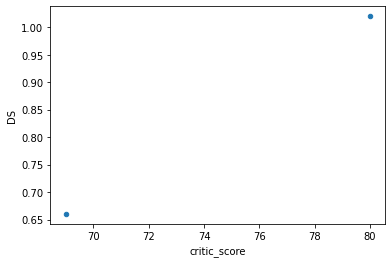

In [65]:
list_platform_2003 = ['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

for element in list_platform_2003:
    element_critic_score = platform_top_2003.query('platform == @element and critic_score != -1')
    element_critic_score.plot(x = 'critic_score', y = 'sum_sale', kind = 'scatter', ylabel = element)
    display('Коэффициент корреляции для платформы', element, 'равен', element_critic_score['critic_score'].corr(element_critic_score['sum_sale']))

Значения коэффициента корреляции, говорит о том, что отсутствует линейная зависимость между оценкой критиков и объемами продаж. Значение коэффициента корреляции для платформы DS не может быть показательным, по диаграмме рассеяния видно, что выборка мала.

6. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [66]:
genre_count = (df_2003.groupby('genre')['name'].count().sort_values(ascending=False).to_frame()) # количество выпущенных игр по жанрам в период с 2012- 2016 года

In [67]:
genre_count 

,name
genre,
Action,1041
Role-Playing,370
Adventure,302
Sports,268
Shooter,237
Misc,193
Racing,115
Fighting,109
Platform,85


In [68]:
genre_sale =(df_2003.groupby('genre')['sum_sale'].sum().sort_values(ascending=False).to_frame()) # объемы продаж игр разных жанров в период с 2012-2016 годов  

In [69]:
genre_sale

,sum_sale
genre,
Action,446.41
Shooter,304.75
Role-Playing,192.80
Sports,181.07
Misc,85.28
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


Самым прибыльным жанром является жанр "Действие", самым низкодоходным жанр "Головоломка".

In [70]:
display(genre_count['name'].corr(genre_sale['sum_sale']))# коэффициент корреляции зависимости жанра игры и объема продаж

0.8574706421357056

Значение коэффициента корреляции говорит о линейной зависимости между жанром игры и продажами на всех платформах по данным таблицы за 2012-2016 года.

In [71]:
genre_sale_median =(df_2003.groupby('genre')['sum_sale'].median().sort_values(ascending=False).to_frame())# вывод медианных продаж по жанрам

In [72]:
genre_sale_median

,sum_sale
genre,
Shooter,0.430
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


(0.0, 2.0)

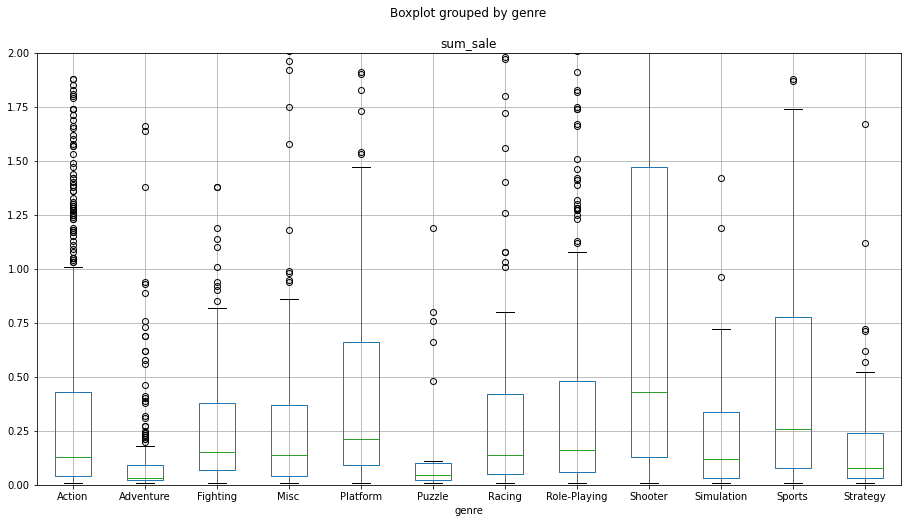

In [73]:
platform_top_2003.boxplot(column='sum_sale', by='genre', figsize=(15,8))

plt.ylim(0, 2)

Самые большие медианные продажи у жанра Shooter, Sports, Platform.

**3. Вывод**

1.В данном разделе выяснили, что для опеределения параметров, влияющих на успех компьютерной игры в 2017 года, необходимо взять данные за 2012-2016 годы, так как на данный временной промежуток приходились самые большие продажи на платформах и в эти временные границы произошла смена старых платформ на новые. 

2.Так же с расчетом коэффициента корреляции выяснили, что нет прямой зависимости между оценкой пользователей и критиков к продажам, есть сильная линейная зависимость между жанром игры и продажами игр.

3.Самые популярным жанром является жанр "Действие", самым малопопулярным жанром - "Головоломка".
4. Самые большие медианные продажи у жанра Shooter.

**4. Составление портрета пользователя игр каждого региона**

Определим для пользователя каждого региона (NA, EU, JP):

•	Самые популярные платформы (топ-5). 

•	Самые популярные жанры (топ-5). 

•	Влияет ли рейтинг ESRB на продажи в отдельном регионе


In [74]:
platform_top_2003.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,-1,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


4.1 Продажи игр в Северной Америке.

In [75]:
platform_top_2003.groupby('platform')['na_sales'].sum().sort_values(ascending=False).to_frame().head() #вывод 5 самых популярных платформ

,na_sales
platform,
X360,140.57
PS4,108.74
PS3,103.74
XOne,93.12
3DS,55.49


In [76]:
platform_top_2003.groupby('genre')['na_sales'].sum().sort_values(ascending=False).to_frame().head() #вывод 5 самых популярных жанров игр

,na_sales
genre,
Action,180.00
Shooter,144.79
Sports,81.45
Role-Playing,64.00
Misc,38.19


In [77]:
platform_top_2003.groupby('rating')['na_sales'].sum().sort_values(ascending=False).to_frame().head() #вывод 5 самых популярных рейтингов игр

,na_sales
rating,
M,231.67
E,114.24
-1,103.31
E10+,77.83
T,66.02


В Северной Америке популярны игры с рейтингом M -«Для взрослых»: Материалы игры не подходят для подростков младше 17 лет, жанром "действие", платформа X360. Пользователи от 17 лет.

4.2 Продажи игр в Европе.

In [78]:
platform_top_2003.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).to_frame().head() #вывод 5 самых популярных платформ

,eu_sales
platform,
PS4,141.09
PS3,107.27
X360,74.89
XOne,51.59
3DS,42.83


In [79]:
platform_top_2003.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).to_frame().head() #вывод 5 самых популярных жанров игр

,eu_sales
genre,
Action,161.40
Shooter,113.47
Sports,68.87
Role-Playing,48.53
Racing,27.29


In [80]:
platform_top_2003.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).to_frame().head() #вывод 5 самых популярных рейтингов игр

,eu_sales
rating,
M,194.44
E,112.61
-1,91.50
E10+,57.15
T,52.96


В Европе популярны игры с рейтингом M -«Для взрослых»: Материалы игры не подходят для подростков младше 17 лет., игры жанра "действие", платформа PS4. Пользователи от 17 лет.

4.3 Продажи игр в Японии.

In [81]:
platform_top_2003.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).to_frame().head() #вывод 5 самых популярных платформ

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


In [82]:
platform_top_2003.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).to_frame().head() #вывод 5 самых популярных жанров игр

,jp_sales
genre,
Role-Playing,62.63
Action,49.38
Misc,12.45
Simulation,10.35
Shooter,9.23


In [83]:
platform_top_2003.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).to_frame().head() #вывод 5 самых популярных рейтингов игр

,jp_sales
rating,
-1,98.97
E,27.99
T,25.76
M,21.20
E10+,8.19


В Японии популярны игры с рейтингом E -«Для всех»( содержание вполне подходит для возрастной категории от 6 лет), игры жанра "Ролевые", платформа 3DS. Пользователи от 6 лет.
Большинство проданных игр с неопределенным рейтингом по ESRB.

**4. Вывод**

1.Пользователи компьютерных игр в Северной Америке и Европе очень схожи, они выбирают чаще игры жанра "действие", одни платформы X360 и PS4, возраст пользователей от 17 лет.

2.Японскиe пользователи отдают предпочтение играм жанра "ролевые", платформе 3DS, возраст пользователя от 6 лет.

**5. Проверка гипотез**

Необходимо проверить две гипотезы:

1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2.Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

*5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Сформулируем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [84]:
#df['platform'].unique()

In [85]:
platform_xone = df.query('platform == "XOne"')#срез данных для платформы 'XOne'

In [86]:
score_xone = platform_xone[platform_xone['user_score'] != -1] # срез по оценкам пользователей для игр платформы 'XOne'

In [87]:
user_score_xone = score_xone['user_score'] # Series с оценками пользователей

In [88]:
platform_pc = df.query('platform == "PC"') #срез данных для платформы 'PC'

In [89]:
score_pc = platform_pc[platform_pc['user_score'] != -1] # срез по оценкам пользователей для игр платформы 'PC'

In [90]:
user_score_pc = score_pc['user_score'] # Series с оценками пользователей

In [91]:
from scipy import stats as st

alpha = 0.05 

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=True)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print(results.pvalue)   

Отвергаем нулевую гипотезу
1.1488062707895399e-05


*5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

Сформулируем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [92]:
game_action = df.query('genre == "Action"') # срез данных для игр жанра 'Action'

In [93]:
score_action = game_action[game_action['user_score'] != -1] # срез по оценкам пользователей для игр жанра 'Action'

In [94]:
user_score_action = score_action['user_score'] # Series с оценками пользователей

In [95]:
game_sports = df.query('genre == "Sports"') # срез данных для игр жанра 'Sports'

In [96]:
score_sports = game_sports[game_sports['user_score'] != -1] # срез по оценкам пользователей для игр жанра 'Sports'

In [97]:
user_score_sports = score_sports['user_score'] # Series с оценками пользователей игр жанра 'Sports'

In [98]:
from scipy import stats as st

alpha = 0.05 

results = st.ttest_ind(user_score_action, user_score_sports, equal_var=True)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print(results.pvalue)   

Не получилось отвергнуть нулевую гипотезу
0.08026081264564007


**5. Вывод:**

1. Статистическая вероятность того, что средние рейтинги игр на платформах Xone и PC равны очень мала. Гипотеза не подтвердилась.
2. Статистическая вероятность того, что средние рейтинги игр жанров  Action и Sports равны- равна 10%. Гипотеза не подтвердилась.

**6. Общий вывод**

Исходя из результатов исследования однозначно можно сделать вывод, что на успешность продаж игры влияет жанр игры, имеет слабую зависимость оценка критиков на игру, и совсем не имеет влияние оценка пользователей.
Поэтому при подготовке рекламных кампаний следует учитывать, что в разных регионах пользователи предпочитают разные жанры игр. Для Северной Америки и Европы это жанр 'Действие', платформы X360 и PS4, возрастной рейтинг от 17 лет.
Для Японии это жанр "Ролевые", платформа 3DS, возрастной рейтинг от 6 лет.
